<a href="https://colab.research.google.com/github/hxtruong/fb-developer-circles/blob/master/DAwP_Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![](https://i.imgur.com/0AUxkXt.png)

# SF Salaries Exercise 

Explore San Francisco city employee salary data.

## Overview

One way to understand how a city government works is by looking at who it employs and how its employees are compensated. This data contains the names, job title, and compensation for San Francisco city employees on an annual basis from 2011 to 2014.



Just follow along and complete the tasks outlined in bold below. The tasks will get harder and harder as you go along.

## Resourses

[Pandas API Reference](https://pandas.pydata.org/pandas-docs/stable/api.html)

[NumPy Reference](https://docs.scipy.org/doc/numpy/reference/)

[Visualization with Seaborn](https://jakevdp.github.io/PythonDataScienceHandbook/04.14-visualization-with-seaborn.html)


**Import libraries**

In [0]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

**Read `Salaries.csv` as a dataframe called `sal`.**

In [0]:
link = "https://s3-ap-southeast-1.amazonaws.com/intro-to-ml-minhdh/Salaries.csv"
sal = pd.read_csv(link)

**Check the head of the DataFrame.**

In [4]:
sal.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


**Use the .info() method to find out how many entries there are.**

In [5]:
sal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
Id                  148654 non-null int64
EmployeeName        148654 non-null object
JobTitle            148654 non-null object
BasePay             148045 non-null float64
OvertimePay         148650 non-null float64
OtherPay            148650 non-null float64
Benefits            112491 non-null float64
TotalPay            148654 non-null float64
TotalPayBenefits    148654 non-null float64
Year                148654 non-null int64
Notes               0 non-null float64
Agency              148654 non-null object
Status              0 non-null float64
dtypes: float64(8), int64(2), object(3)
memory usage: 14.7+ MB


**What is the average BasePay ?**

Keyword: [mean](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.mean.html)

In [14]:
sal['BasePay'].mean()

66325.44884050643

**What is the lowest and highest amount of BasePay?**

Keyword: 
[min](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.min.html) , 
[max](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.max.html)

In [15]:
sal['BasePay'].min()

-166.01

In [16]:
sal['BasePay'].max()

319275.01

**How about OvertimePay in the dataset? What is the average, lowest, highest amount?**

In [18]:
sal['OvertimePay'].describe()


count    148650.000000
mean       5066.059886
std       11454.380559
min          -0.010000
25%           0.000000
50%           0.000000
75%        4658.175000
max      245131.880000
Name: OvertimePay, dtype: float64

**What is the job title of  JOSEPH DRISCOLL ? Note: Use all caps, otherwise you may get an answer that doesn't match up (there is also a lowercase Joseph Driscoll).**

In [20]:
sal.columns

Index(['Id', 'EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year', 'Notes', 'Agency',
       'Status'],
      dtype='object')

In [27]:
sal[sal.EmployeeName.str.contains('JOSEPH DRISCOLL',case=False)]

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
24,25,JOSEPH DRISCOLL,"CAPTAIN, FIRE SUPPRESSION",140546.86,97868.77,31909.28,NaN,270324.91,270324.91,2011,NaN,San Francisco,NaN
36198,36199,Joseph Driscoll,"Captain, Fire Suppression",145658.98,114513.29,28743.36,42919.16,288915.63,331834.79,2012,NaN,San Francisco,NaN


In [28]:
# Now try to select Employees who have name "GARY JIMENEZ"
# Your code here
sal[sal.EmployeeName.str.contains('GARY JIMENEZ',case=False)]


,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN


**How much does JOSEPH DRISCOLL make (including benefits)?**

In [32]:
josephDriscoll = sal[sal.EmployeeName.str.contains('JOSEPH DRISCOLL',case=False)]
josephDriscoll
josephDriscoll['TotalPayBenefits']

24       270324.91
36198    331834.79
Name: TotalPayBenefits, dtype: float64

**What is the name of highest paid person (including benefits)?**

In [36]:
# sal.loc[sal['TotalPayBenefits'].idxmax()]
sal.loc[sal['TotalPayBenefits'].idxmax()].EmployeeName

'NATHANIEL FORD'

**What is the name of lowest paid person (including benefits)? Do you notice something strange about how much he or she is paid?**

In [37]:
sal.loc[sal['TotalPayBenefits'].idxmin()]

Id                                      148654
EmployeeName                         Joe Lopez
JobTitle            Counselor, Log Cabin Ranch
BasePay                                      0
OvertimePay                                  0
OtherPay                               -618.13
Benefits                                     0
TotalPay                               -618.13
TotalPayBenefits                       -618.13
Year                                      2014
Notes                                      NaN
Agency                           San Francisco
Status                                     NaN
Name: 148653, dtype: object

- TotalPayBenefits is less than 0 (-618.13). I think he is minus his salary when he is punished

**What was the average (mean) BasePay of all employees per year? (2011-2014) ?**
Keyword: _groupby_

In [50]:
basePayGroup = sal.groupby(['BasePay']).mean()
basePayGroup.sort_values(['Year'])


,Id,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Status
BasePay,,,,,,,,,
94187.23,8321.00,5740.970,5771.3700,NaN,105699.5700,105699.5700,2011.0,NaN,NaN
39755.70,25712.00,0.000,6626.1300,NaN,46381.8300,46381.8300,2011.0,NaN,NaN
91886.62,8597.00,1277.370,11358.7600,NaN,104522.7500,104522.7500,2011.0,NaN,NaN
39760.03,26688.00,0.000,432.0000,NaN,40192.0300,40192.0300,2011.0,NaN,NaN
91872.76,9453.00,1784.700,6615.8000,NaN,100273.2600,100273.2600,2011.0,NaN,NaN
91872.07,10094.00,3077.740,1689.4100,NaN,96639.2200,96639.2200,2011.0,NaN,NaN
39791.14,26617.00,0.000,900.2000,NaN,40691.3400,40691.3400,2011.0,NaN,NaN
91861.18,7665.00,6690.290,10756.3000,NaN,109307.7700,109307.7700,2011.0,NaN,NaN
91858.02,8320.00,6335.090,7511.3500,NaN,105704.4600,105704.4600,2011.0,NaN,NaN


**How many unique job titles are there?**

Keyword: _unique, nunique_

In [52]:
sal['JobTitle'].unique()

array(['GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY',
       'CAPTAIN III (POLICE DEPARTMENT)',
       'WIRE ROPE CABLE MAINTENANCE MECHANIC', ..., 'Conversion',
       'Cashier 3', 'Not provided'], dtype=object)

**What are the top 5 most common jobs?**

Keyword: *value_counts*

In [57]:
sal['JobTitle'].value_counts()[:5]

Transit Operator                7036
Special Nurse                   4389
Registered Nurse                3736
Public Svc Aide-Public Works    2518
Police Officer 3                2421
Name: JobTitle, dtype: int64

**How many Job Titles were represented by only one person in 2013? (e.g. Job Titles with only one occurence in 2013?)**

In [63]:
sal.columns

Index(['Id', 'EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year', 'Notes', 'Agency',
       'Status'],
      dtype='object')

In [94]:
sal[sal['Year']==2013]['EmployeeName'].value_counts()

Steven  Lee                 5
Kevin  Lee                  5
Michael A Johnson           4
William  Wong               4
Victor  Lee                 4
Sherri L Barnes             3
David  Chow                 3
Susan  Wong                 3
Michele M Lee               3
Maryann B Sabath            3
Pierre F Palaad             3
Michael A Jones             3
Gregory J Gieseker          3
David H Staconis            3
Shirley  Li                 3
Maria Lesa R Busine         3
Besilda M Mandapat          3
Corinna A Neustaetter       3
Kenneth  Lee                3
Mary E Mays                 3
John  Chan                  3
Emelita M Hathaway          3
Jamil J Hawkins             3
Daniel W McGuire            3
Pamela A Axelson            3
Marie T Watson-Grosskopf    3
Krisztina  Emodi            3
Cynthia J Anderson          3
Jennifer J Chiu             3
Evelyn M Palomares          3
                           ..
Brian P Louie               1
Duane  Einhorn              1
Michael G 

**How many people have the word Chief in their job title?**

In [105]:
sal[sal['JobTitle'].str.contains('Chief',case=False)].count()

Id                  627
EmployeeName        627
JobTitle            627
BasePay             624
OvertimePay         627
OtherPay            627
Benefits            423
TotalPay            627
TotalPayBenefits    627
Year                627
Notes                 0
Agency              627
Status                0
dtype: int64

## Data Visualization

**Implement seaborn's countplot with x='Year'**

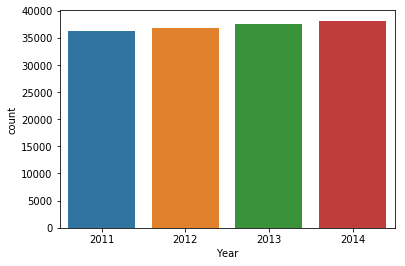

In [106]:
sns.countplot(x='Year', data=sal)

**Implement seaborn's distplot for BasePay of Year 2011**

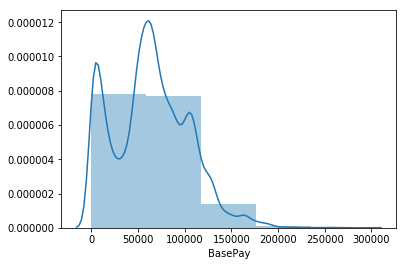

In [116]:
a2 = sal[sal['Year']==2011]['BasePay']
sns.distplot(a2, bins=5)

**How about other Year**

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


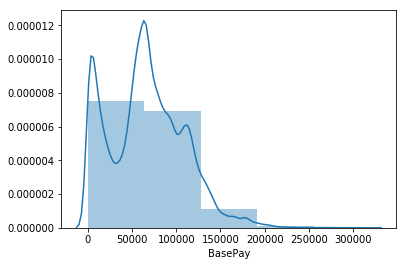

In [117]:
a3 = sal['BasePay']
sns.distplot(a3, bins=5)

## Bonus

**Visualize top 5 Jobs with BasePay, Benefits and OvertimePay**

Keyword: *index, isin, groupby, mean, plot*

In [135]:
# sal[sal['JobTitle']==sal['JobTitle'].value_counts()]
# t1 = sal.groupby('JobTitle')[]
topJob = sal['JobTitle'].value_counts().head(5)
sal['JobTitle'].isin(topJob)

0         False
1         False
2         False
3         False
4         False
5         False
6         False
7         False
8         False
9         False
10        False
11        False
12        False
13        False
14        False
15        False
16        False
17        False
18        False
19        False
20        False
21        False
22        False
23        False
24        False
25        False
26        False
27        False
28        False
29        False
          ...  
148624    False
148625    False
148626    False
148627    False
148628    False
148629    False
148630    False
148631    False
148632    False
148633    False
148634    False
148635    False
148636    False
148637    False
148638    False
148639    False
148640    False
148641    False
148642    False
148643    False
148644    False
148645    False
148646    False
148647    False
148648    False
148649    False
148650    False
148651    False
148652    False
148653    False
Name: JobTitle, Length: 

**Fun Fact: Is there a correlation between length of the Job Title string and Salary?**

*Hint: corr()*

,Id,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Status
Id,1.000000,-0.204878,-0.081505,-0.100403,-0.348957,-0.211478,-0.092190,0.968171,NaN,NaN
BasePay,-0.204878,1.000000,0.266740,0.285655,0.918028,0.954494,0.946595,0.033751,NaN,NaN
OvertimePay,-0.081505,0.266740,1.000000,0.316592,0.301207,0.504859,0.467981,0.027887,NaN,NaN
OtherPay,-0.100403,0.285655,0.316592,1.000000,0.233178,0.470496,0.422341,-0.002499,NaN,NaN
Benefits,-0.348957,0.918028,0.301207,0.233178,1.000000,0.884097,0.930140,-0.043136,NaN,NaN
TotalPay,-0.211478,0.954494,0.504859,0.470496,0.884097,1.000000,0.977313,0.032090,NaN,NaN
TotalPayBenefits,-0.092190,0.946595,0.467981,0.422341,0.930140,0.977313,1.000000,0.151947,NaN,NaN
Year,0.968171,0.033751,0.027887,-0.002499,-0.043136,0.032090,0.151947,1.000000,NaN,NaN
Notes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Status,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


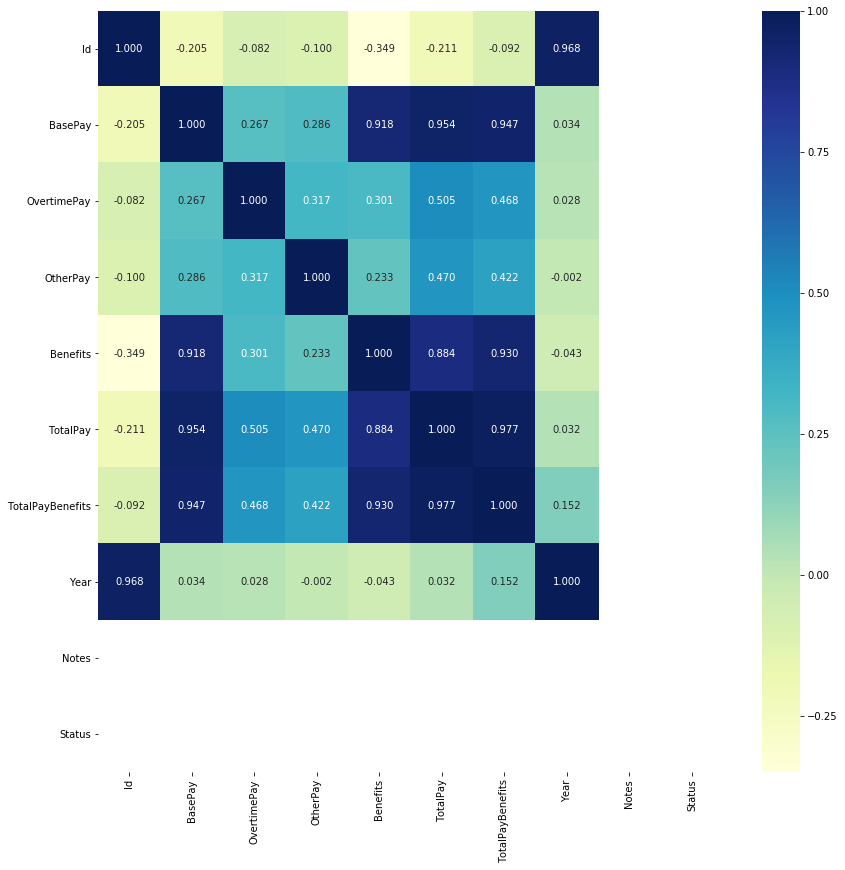

In [120]:
plt.figure(figsize=(14,14))
sns.heatmap(sal.corr(), annot=True, fmt='.3f', cmap='YlGnBu')
sal.corr()

There **is not** a  correlation between *length of the Job Title string* and *Salary*

# Great Job!